In [1]:
import rioxarray
import matplotlib.pyplot as plt
import numpy as np

In [3]:
water = rioxarray.open_rasterio('../Koukou-2025-08-16_clip_water.tif')
terrain = rioxarray.open_rasterio('/media/bruno/Matosak/repos/flood-inference-tool/images/COP-DEM-GLO-30.tif')

In [4]:
terrain = terrain.rio.reproject_match(water)
terrain

<xarray.DataArray (band: 1, y: 4302, x: 7088)> Size: 122MB
array([[[549.66125, 549.66125, 549.66125, ..., 615.47345, 615.47345,
         616.05945],
        [549.66125, 549.66125, 549.66125, ..., 615.47345, 615.47345,
         616.05945],
        [549.66125, 549.66125, 549.66125, ..., 615.47345, 615.47345,
         616.05945],
        ...,
        [487.93704, 487.93704, 487.93704, ..., 511.17947, 511.17947,
         511.53235],
        [487.93704, 487.93704, 487.93704, ..., 511.17947, 511.17947,
         511.53235],
        [488.48718, 488.48718, 488.48718, ..., 510.49088, 510.49088,
         511.96738]]], shape=(1, 4302, 7088), dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 34kB 12.11 12.11 12.11 12.11 ... 11.72 11.72 11.72
  * x            (x) float64 57kB 21.29 21.29 21.29 21.29 ... 21.92 21.92 21.92
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    scale_factor:   1.0
    add_offset:     0.0
    _FillValue:     nan

[]

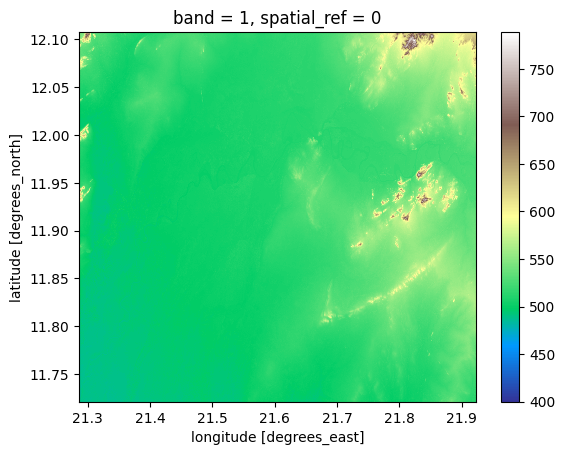

In [7]:
terrain.plot(vmin=400, cmap='terrain')
plt.plot()

In [8]:
water.to_numpy().shape

(1, 4302, 7088)

In [9]:
terrain.to_numpy().shape

(1, 4302, 7088)

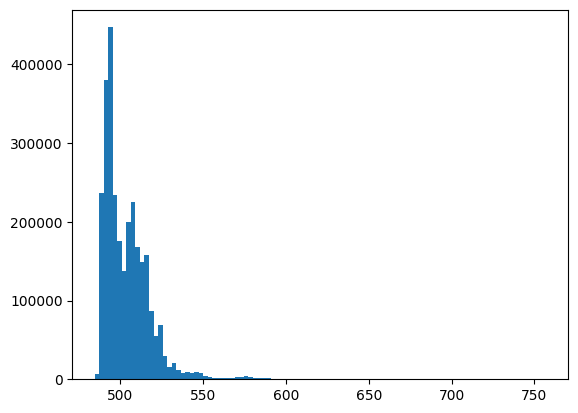

In [12]:
plt.hist(terrain.to_numpy()[water.to_numpy()==1], bins=100)
plt.show()

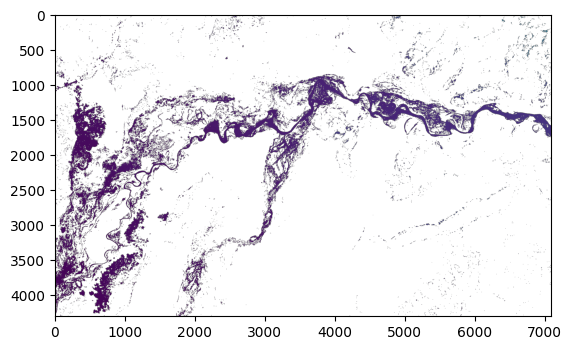

In [13]:
terrain_flooded = terrain.to_numpy()[0].copy()
terrain_flooded[water.to_numpy()[0]!=1] = None

plt.imshow(terrain_flooded)
plt.show()

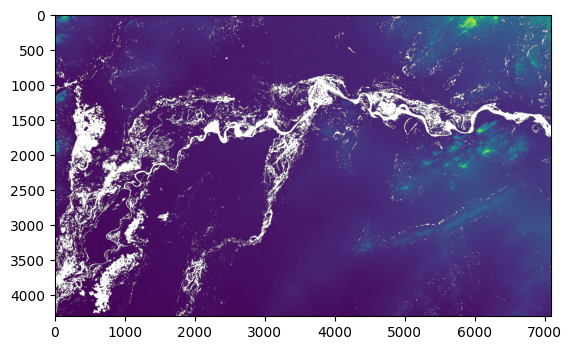

In [14]:
terrain_not_flooded = terrain.to_numpy()[0].copy()
terrain_not_flooded[water.to_numpy()[0]==1] = None
terrain_not_flooded[water.to_numpy()[0]==2] = None

plt.imshow(terrain_not_flooded)
plt.show()

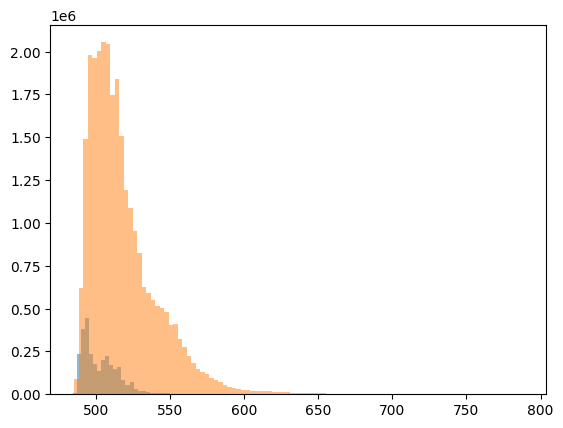

In [15]:
plt.hist(terrain_flooded[terrain_flooded!=None], bins=100, alpha=0.5)
plt.hist(terrain_not_flooded[terrain_not_flooded!=None], bins=100, alpha=0.5)
plt.show()

In [16]:
np.nanmax(terrain_flooded)

np.float32(756.869)

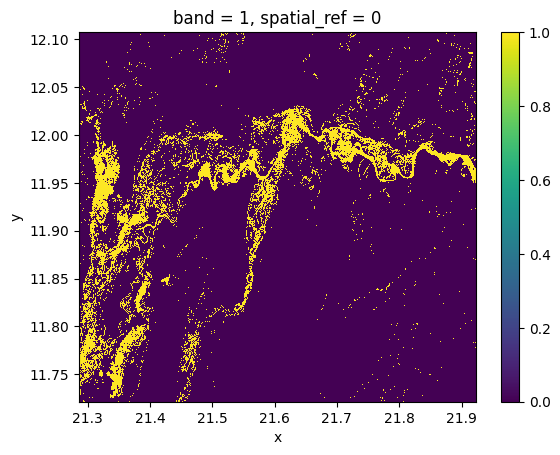

In [17]:
water.plot()

In [24]:
flooded_percentile = np.nanpercentile(terrain_flooded, 50)
flooded_percentile

np.float32(500.1922)

In [25]:
water_np = water.to_numpy()[0].astype(np.float32)
water_np[water_np==2] = None

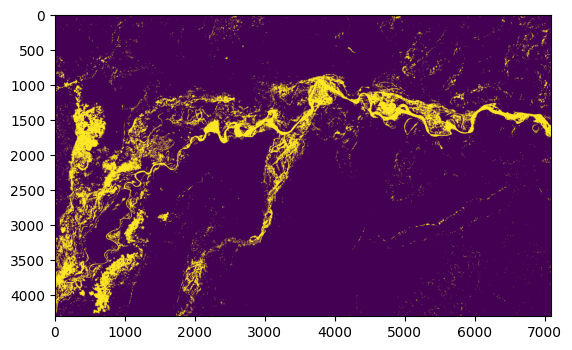

In [26]:
plt.imshow(water_np)
plt.show()

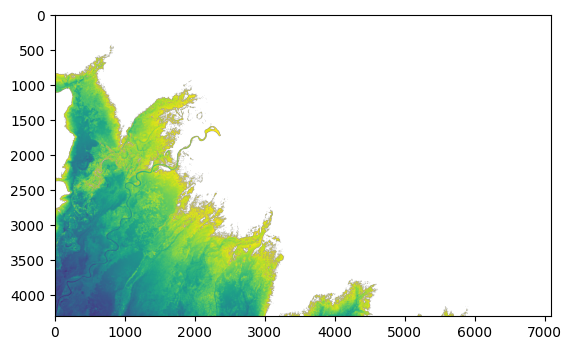

In [27]:
water_modeled = terrain.to_numpy()[0]
water_modeled[np.isnan(water_np)] = None
water_modeled[water_modeled>flooded_percentile] = None

plt.imshow(water_modeled)
plt.show()

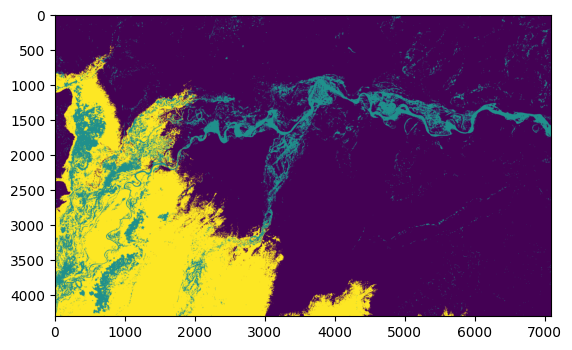

In [28]:
water_np[(np.invert(np.isnan(water_modeled)) & (water_np==0))] = 2

plt.imshow(water_np)
plt.show()

In [ ]:
import rasterio

water_np[np.isnan(water_np)] = 3

with rasterio.Env():

    # Write an array as a raster band to a new 8-bit file. For
    # the new file's profile, we start with the profile of the source
    profile = rasterio.open('/media/bruno/Matosak/repos/Bangladesh_small_water.tif').profile

    # And then change the band count to 1, set the
    # dtype to uint8, and specify LZW compression.
    profile.update(
        dtype=rasterio.uint8,
        count=1,
        nodata=3,
        compress='lzw')

    with rasterio.open('../Koukou-2025-08-16_clip_water_modeled.tif', 'w', **profile) as dst:
        dst.write(water_np.astype(rasterio.uint8), 1)

In [17]:
import torch

data = torch.load('models_trainings/test_world_emb_cd128_pm50_pl500_bs128/checkpoints/model-0045.pt', weights_only=True)

In [18]:
data.keys()

dict_keys(['epoch', 'model_state_dict', 'optimizer_state_dict', 'losses'])

In [19]:
data['model_name'] = 'SimpleUNetEmb'
data['chip_size'] = 128
data['use_emb'] = True

In [20]:
torch.save(data, 'models/model_SimpleUNetEmb_wEmb.pt')

In [ ]:
import rasterio as r
import numpy as np
from rasterio.crs import CRS
from rasterio import warp

ref = r.open('images/COP-DEM-GLO-30.tif')
coords = np.asarray([[np.random.randint(0, ref.width), np.random.randint(0, ref.height)] for i in range(100)])

coords_raster = np.asarray(r.transform.xy(ref.transform, rows=coords[:,1], cols=coords[:,0])).T
coords_latlong = np.asarray(warp.transform(src_crs=ref.crs, dst_crs=CRS.from_epsg(4326), xs=coords_raster[:,0], ys=coords_raster[:,1])).T

array([[21.67138889, 11.99888889],
       [21.26194444, 12.33055556],
       [21.64361111, 12.77833333],
       [21.19194444, 11.77722222],
       [21.60666667, 12.96166667],
       [21.44166667, 12.00527778],
       [21.79805556, 11.3825    ],
       [21.36861111, 11.02555556],
       [21.26916667, 12.56694444],
       [21.03      , 11.78166667],
       [21.47777778, 11.04361111],
       [21.41444444, 12.38083333],
       [21.33527778, 12.60722222],
       [21.50055556, 11.16305556],
       [21.2125    , 11.25611111],
       [21.78972222, 11.49861111],
       [21.28138889, 12.39138889],
       [21.13583333, 11.4925    ],
       [21.44972222, 12.45555556],
       [21.75444444, 11.1275    ],
       [21.53194444, 11.51611111],
       [21.9325    , 11.86694444],
       [21.02861111, 12.78666667],
       [21.36083333, 11.83361111],
       [21.42      , 12.81138889],
       [21.24944444, 11.89277778],
       [21.59972222, 12.01222222],
       [21.67138889, 12.94805556],
       [21.20666667,

In [14]:
import torch

In [16]:
d = torch.zeros(100).to('cuda').detach().cpu().numpy()
d

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)